# HydroGeoSines

## How to correct groundwater heads from Earth tides and atmospheric pressure influences


### Import HGS
*Note*: Currently, the HydroGeoSines is not fully implemented as an installable package. Instead. we have to move to the parent directory, to import the package.

In [2]:
import os
os.chdir("../../")
print("Current Working Directory: ", os.getcwd())

Current Working Directory:  D:\WORK\GitHub\HydroGeoSines


In [3]:
# Load the HGS package
import hydrogeosines as hgs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Import a dataset

Import data from a CSV file.

In [4]:
fowlers = hgs.Site('Fowlers Gap', geoloc=[141.73099, -31.2934, 160])

fowlers.import_csv('tests/data/fowlers_gap/acworth_all.csv', 
                        input_category=['BP', 'GW', 'GW', 'GW', 'ET'], 
                        utc_offset = 10, 
                        unit=['m', 'm', 'm', 'm', 'm**2/s**2'], 
                        loc_names = ["Baro", "FG822-1", "FG822-2", "Smith", "ET"],
                        how="add", check_duplicates=True)

Datetime was 'naive'. Localized and converted to UTC!
A new time series was added ...
No duplicates found ...


### Correcting groundwater hydraulic heads

Now we can correct the groundwater hydraulic heads:

In [11]:
one_site = hgs.Processing(fowlers).by_gwloc('FG822-2')

corrected = one_site.GW_correct(lag_h=10, et_method=None)

-------------------------------------------------
Method: GW_correct
There were no gaps in the data after resampling!
0.00 % of the 'BP' data at 'Baro_all' was interpolated due to gaps < 3600s!
0.00 % of the 'GW' data at 'FG822-2_all' was interpolated due to gaps < 3600s!
The groundwater (GW) and  BP data is aligned. There is exactly one BP for every GW entry!
The groundwater (GW) and  BP data is aligned. There is exactly one BP for every GW entry!
-------------------------------------------------
> Correcting GW for location: FG822-2
>> Applying regression deconvolution ...
>> Reference: Method by Rasmussen and Crawford (1997) [https://doi.org/10.1111/j.1745-6584.1997.tb00111.x]
>> Using harmonic least-squares to estimate Earth tide influences ...
-------------------------------------------------
> Correcting GW for location: FG822-2
>> Applying regression deconvolution ...
>> Reference: Method by Rasmussen and Crawford (1997) [https://doi.org/10.1111/j.1745-6584.1997.tb00111.x]
>> Us

### Exporting and visualising the results

The corrected heads are in the results object:

In [9]:
hgs.Output(corrected).export(folder="export")

-------------------------------------------------
Exporting location: FG822-2
Exporting location: FG822-2


This will write a comma seperated value (csv) file to the subfolder 'export'.

The results can also be visualised:

-------------------------------------------------
Plotting location: FG822-2
Plotting location: FG822-2


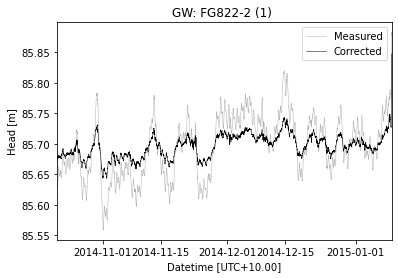

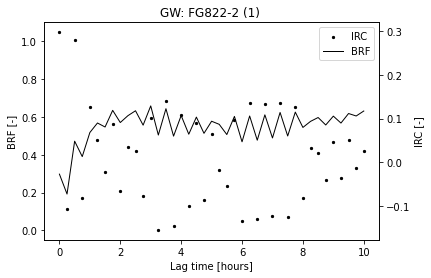

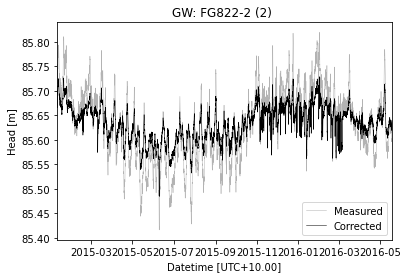

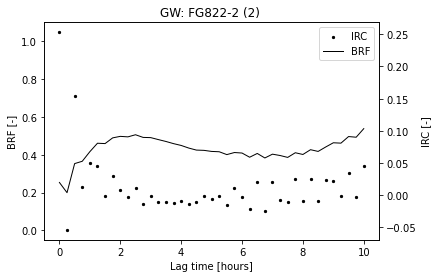

In [12]:
hgs.Output(corrected).plot(folder="export")